In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train_norm,x_test_norm = x_train/255.0,x_test/255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.5036 - accuracy: 0.8810
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2312 - accuracy: 0.9349
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1795 - accuracy: 0.9499
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1494 - accuracy: 0.9574
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1286 - accuracy: 0.9637
Epoc

In [5]:
#input layer shape
print(x_train_reshaped.shape)

X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [13]:
weight_init_std = 0.1
input_size = 784
hidden_size = 50

# W parameter and initialize with random
W1 = weight_init_std*np.random.randn(input_size,hidden_size)
# bias parameter and initialize with zero
b1 = np.zeros(hidden_size)
# print hidden layer
a1 = np.dot(X,W1)+b1


print(W1.shape)
print(b1.shape)
print(a1.shape)

a1[0]

(784, 50)
(50,)
(5, 50)


array([-0.74850628,  0.55669779,  2.41997147,  1.21350021,  1.08359834,
       -0.84679222, -0.43588178,  1.53313937, -1.41345023, -0.88363661,
        0.31463688, -0.50554641, -1.54576948, -1.22136581, -0.98880961,
       -1.24718766, -0.54338407, -0.41749156,  0.45219516,  0.4232572 ,
        0.36417321, -0.48915967,  0.32447074,  0.19402388,  1.8681683 ,
        0.57967728,  0.92289224,  0.53211539, -0.29666651,  1.16908539,
        0.10836168,  0.8473444 ,  0.22003645,  0.58506959,  1.13696131,
       -0.61588233, -0.4870012 , -0.88541969,  0.34700786,  1.74215685,
       -0.12809008,  0.62045573,  0.75713395, -0.7831663 ,  0.19343164,
       -0.31726577,  0.82276374, -0.11766011,  0.61474298,  1.28632536])

## Activation Functions
딥러닝에서는 이 활성화 함수의 존재가 필수적. 비선형 함수를 MLP 안에 포함시키므로써 모델의 표현력을 상승시킴.

- Sigmoid

     - vanishing gradient 현상 발생
     - exp 함수 사용시 비용이 크다
    = 현재는 sigmoid 보다 ReLu 가 더 많이 사용됨

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
z1 = sigmoid(a1)
print(z1[0])

[0.32114686 0.63568813 0.9183376  0.77091768 0.74717433 0.3001062
 0.39272269 0.82246518 0.19569044 0.29242475 0.57801667 0.37623813
 0.17569813 0.22769618 0.27114727 0.22318735 0.36740071 0.39711715
 0.61116103 0.60426241 0.59005027 0.38009155 0.58041342 0.54835437
 0.86624619 0.64099314 0.71563105 0.62997636 0.42637258 0.76297966
 0.52706394 0.70000977 0.55478824 0.64223308 0.7571213  0.35071853
 0.38060026 0.29205595 0.58589181 0.85096082 0.46802119 0.65032219
 0.68073116 0.31363788 0.54820769 0.42134224 0.69482269 0.47061886
 0.64902198 0.78352457]


- Tanh

     - tanh 함수는 함수의 중심값을 0 으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결 
     - vanishing gradient 문제 존재

- ReLu

    - sigmoid, tanh 에 비해 학습이 빠름
    - 연산비용이 크지 않고 구현이 매우 간단

In [17]:
def affine_layer_forward(X,W,b):
    y = np.dot(X,W)+b
    cache = (X,W,b)
    return y,cache

In [18]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[-0.55702134 -0.41042001 -0.04121196 -0.14757111  0.16352174 -0.83914963
 -0.04489662 -0.46421191 -0.13158371 -0.70922845]


In [19]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [20]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.07516673, 0.08703498, 0.1259038 , 0.11320032, 0.15450892,
       0.05668901, 0.12544074, 0.08247689, 0.11502464, 0.06455397])

## Loss Function
우리가 원하는 정답과 출력층에 전달된 신호정보들 사이의 차이를 계산

- MSE : Mean Square Error

- Cross Entropy :    
    두 확률분포 사이의 유사도가 클수록 작아지는 값

In [21]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [22]:
print(y_hat[0])
print(t[0])

[0.07516673 0.08703498 0.1259038  0.11320032 0.15450892 0.05668901
 0.12544074 0.08247689 0.11502464 0.06455397]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.4748649895505954

## Gradient  Descent
각 단계에서 기울기를 구해서 해당 기울기가 가리키는 방향으로 이동하는 방법

- learning rate : 한번에 이동하는 발걸음 크기

In [24]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01503335,  0.017407  ,  0.02518076,  0.02264006,  0.03090178,
        -0.1886622 ,  0.02508815,  0.01649538,  0.02300493,  0.01291079],
       [-0.18361717,  0.0181024 ,  0.02280019,  0.02004019,  0.03376789,
         0.01260187,  0.02580292,  0.01855335,  0.02006755,  0.0118808 ],
       [ 0.01517185,  0.02404501,  0.02257389,  0.01414339, -0.16295115,
         0.01289047,  0.0295842 ,  0.01022895,  0.02263014,  0.01168325],
       [ 0.01814236, -0.18329826,  0.02020288,  0.02110017,  0.0321201 ,
         0.01384001,  0.02252402,  0.01663716,  0.0268109 ,  0.01192065],
       [ 0.0167824 ,  0.01923791,  0.0245613 ,  0.01916129,  0.03240029,
         0.01227378,  0.02547095,  0.01382073,  0.02452629, -0.18823493]])

In [25]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.08097708, -0.00565576,  0.06067603,  0.04968514, -0.01029866,
        -0.04441766,  0.06728462,  0.0388338 ,  0.05999775, -0.13512819],
       [-0.0371705 , -0.05823986,  0.0723734 ,  0.05997341, -0.03351779,
        -0.07672277,  0.08058784,  0.04601931,  0.07383519, -0.12713823],
       [-0.0729904 , -0.0839308 ,  0.08193642,  0.06874195, -0.04074104,
        -0.09126096,  0.09181468,  0.05348522,  0.08372019, -0.09077526],
       [-0.05762791,  0.01563816,  0.06333407,  0.05013038, -0.08382483,
        -0.07287089,  0.07194012,  0.03860936,  0.06210156, -0.08743004],
       [-0.04444835, -0.06175851,  0.05360119,  0.04658957,  0.00307772,
        -0.12571901,  0.05875181,  0.03616397,  0.05427591, -0.02053429],
       [-0.03909353, -0.00937449,  0.03690299,  0.0311874 ,  0.01017541,
        -0.07090958,  0.04007913,  0.02416964,  0.03632133, -0.0594583 ],
       [-0.12951977, -0.07036969,  0.07806984,  0.06825501,  0.06485746,
        -0.12695727,  0.0845074 ,  0.05409403

In [26]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [27]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [28]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [29]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

## Backpropagation
grdient descent 를 이용하여 구한 기울기를 다시 입력층까지 전달하며 파라미터를 조정    
출력층의 결과와 내가 뽑고자 하는 target 값과의 차이를 구한뒤 그 오차 값을 각 레이어들을 지나며 역전파해가며 각 노드가 가지고 있는 변수들을 갱신해 나가는 방식

In [30]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [31]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.1058147  0.09118848 0.1258302  0.06529731 0.09516854 0.07556684
  0.07575258 0.10774044 0.15686954 0.10077139]
 [0.12065471 0.09634333 0.1005529  0.04976309 0.09180699 0.07042818
  0.07192053 0.13193217 0.15509299 0.1115051 ]
 [0.1024242  0.11074056 0.09986813 0.04545128 0.10236776 0.0634355
  0.07223026 0.12336719 0.16721884 0.11289629]
 [0.0855286  0.09783498 0.10461015 0.0563404  0.10702678 0.07989497
  0.08578791 0.11400658 0.16218419 0.10678544]
 [0.10007337 0.08590492 0.11732663 0.05699394 0.10109856 0.06875387
  0.07287661 0.14053454 0.14666397 0.10977358]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.302110440713519


## Step-by-Step

In [33]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [34]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.07577438 0.09573132 0.05579923 0.06747565 0.10390113 0.08194399
  0.0968056  0.03487476 0.1990151  0.18867882]
 [0.05366249 0.08425433 0.0782757  0.06225745 0.07446832 0.08622045
  0.1065254  0.02964169 0.20717191 0.21752225]
 [0.06566862 0.10132049 0.07028334 0.06094085 0.11866573 0.08827091
  0.10141058 0.04952598 0.17699143 0.16692208]
 [0.06833972 0.08500565 0.06171903 0.06905345 0.09798477 0.10984312
  0.12535564 0.05448438 0.16415387 0.16406037]
 [0.0652894  0.07820154 0.06083686 0.07157519 0.09533042 0.12282394
  0.10113342 0.03892874 0.17524125 0.19063924]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.336123000512606
---------
[[0.09599781 0.11382779 0.05086965 0.06209241 0.1168289  0.10369415
  0.08255598 0.03286044 0.15116655 0.19010634]
 [0.07188689 0.10125672 0.07294281 0.05849671 0.08500577 0.10565129
  0.09286224 0.02852229 0.1604

## Accuracy
predict 값과 label 의 정확도 측정 

In [35]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [36]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.16205197, 0.15585659, 0.03160119, 0.03966556, 0.13390886,
       0.17600024, 0.04421472, 0.02212207, 0.06775114, 0.16682766])

In [37]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [38]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.16205197 0.15585659 0.03160119 0.03966556 0.13390886 0.17600024
 0.04421472 0.02212207 0.06775114 0.16682766]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.09


## The Entire Cycle

- initialize parameter

In [41]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

- learning

In [42]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.299784244481076
train acc, test acc | 0.09751666666666667, 0.0974
Loss:  0.7310877338074087
train acc, test acc | 0.79205, 0.7957
Loss:  0.4338561508320571
train acc, test acc | 0.87715, 0.8793
Loss:  0.3663209318981333
train acc, test acc | 0.8980833333333333, 0.9011
Loss:  0.3432427817713289
train acc, test acc | 0.90725, 0.9093
Loss:  0.36283465744302246
train acc, test acc | 0.9140666666666667, 0.9162
Loss:  0.2245995033872786
train acc, test acc | 0.9190833333333334, 0.9214
Loss:  0.22920146113013706
train acc, test acc | 0.9238, 0.9262
Loss:  0.36212513452094813
train acc, test acc | 0.9270666666666667, 0.9283
Loss:  0.23323021450662945
train acc, test acc | 0.9304, 0.9327
Loss:  0.27847829738584634
train acc, test acc | 0.9331166666666667, 0.9336
Loss:  0.22826438947378566
train acc, test acc | 0.9357166666666666, 0.9358
Loss:  0.1714790164440923
train acc, test acc | 0.9379166666666666, 0.9375
Loss:  0.16205019531196158
train acc, test ac

- Accuracy

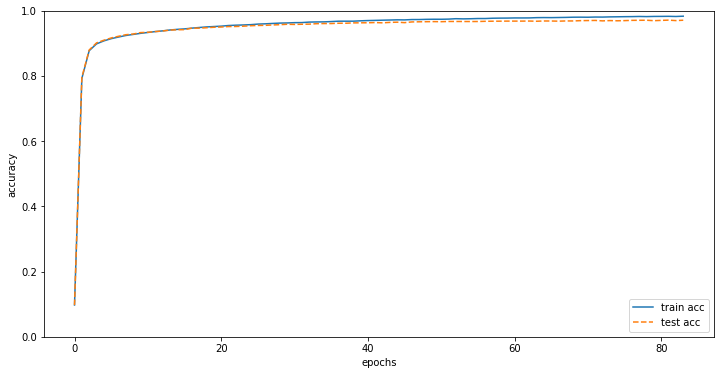

In [43]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- loss

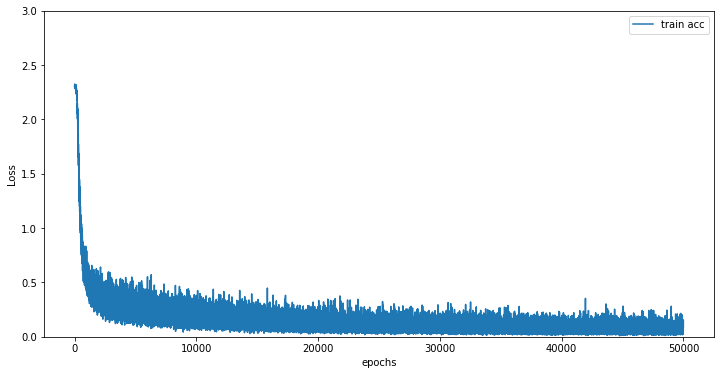

In [44]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()